## **Variables**



In [310]:
!pip install rasterio
!pip install numpy
!pip install matplotlib
!pip install geopandas
!pip install pandas
!pip install seaborn
!pip install statsmodels


In [311]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg



Importamos los mapas

Mapa de pendiente

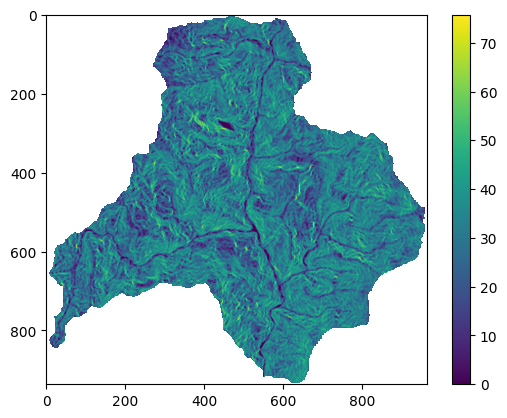

In [312]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();


In [313]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(484040,)

Mapa de curvatura

(484040,)

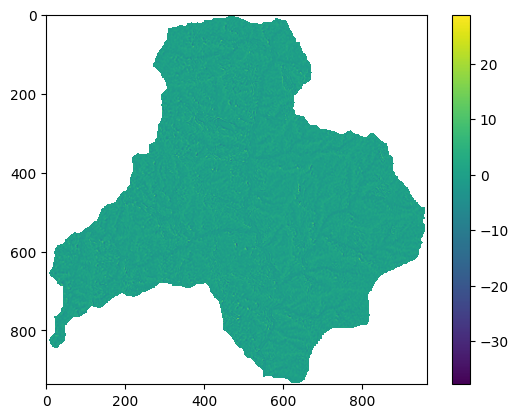

In [314]:

raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Curvatura/Curvatura_p12.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-37.76,np.nan,curvatura)

plt.imshow(curvatura)
plt.colorbar()
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape
curvatura_vector=curvatura.ravel()  # para pasarlo a un vector
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)] # para eliminar  del vector los datos NaN
curvatura_vector_MenM.shape # otra forma de saber las dimensiones


Mapa de flujo acumulado

(484040,)

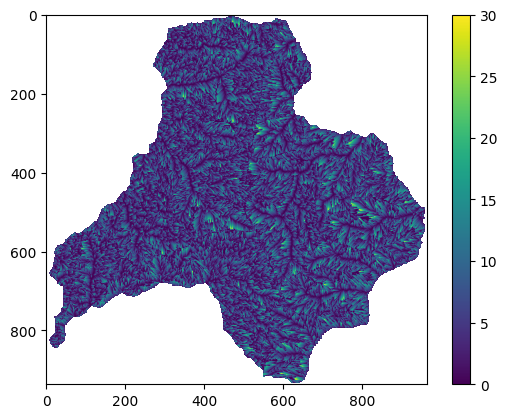

In [315]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Flujo%20acumulado/Flujoacum_11.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>30,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

Mapa de elevación

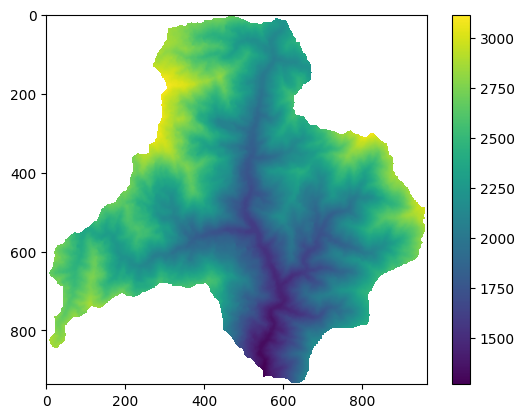

In [316]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Elevaci%C3%B3n/denn1.tif?raw=true')
dem=raster.read(1)
dem=np.where(dem<0,np.nan,dem)
plt.imshow(dem)
plt.colorbar();

In [317]:
dem_vector=dem.ravel()  # para pasarlo a un vector
dem_vector_MenM=dem_vector[~np.isnan(dem_vector)] # para eliminar  del vector los datos NaN
dem_vector_MenM.shape # otra forma de saber las dimensiones

(484040,)

Mapa de aspecto

(484040,)

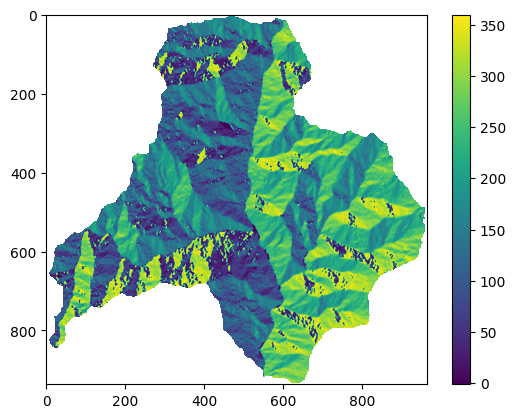

In [318]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Aspecto/Aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

Mapa de geología

(484040,)

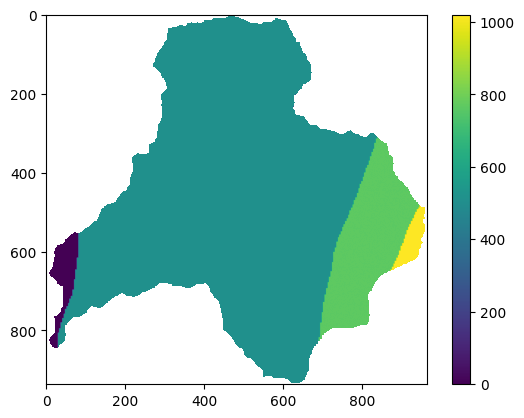

In [319]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Geolog%C3%ADa/Geolog%C3%ADaF.tif?raw=true')
geologia=raster.read(1)

geologia=np.where(geologia<0,np.nan,geologia)

geologia_vector=geologia.ravel()


geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]

geologia_vector_MenM.shape
geologia=msk*geologia
geologia=np.where(geologia==255,1,geologia)
plt.imshow(geologia)
plt.colorbar();
geologia_vector=geologia.ravel()  # para pasarlo a un vector
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)] # para eliminar  del vector los datos NaN
geologia_vector_MenM.shape # otra forma de saber las dimensiones

In [320]:
np.unique(geologia)

array([0.00e+00, 1.00e+00, 5.10e+02, 7.65e+02, 1.02e+03,      nan])

Importamos inventario

(484040,)

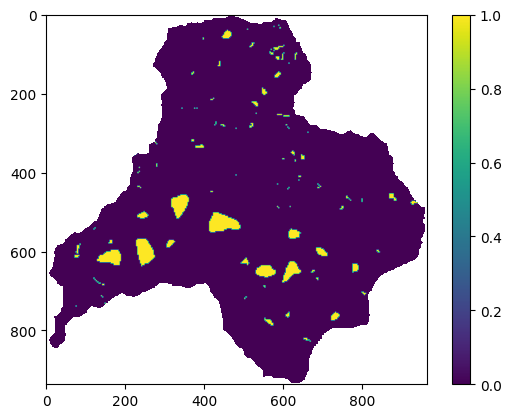

In [321]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

Crear Dataframe

In [322]:
d={'inventario':inventario_vector_MenM,'dem':dem_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'dem', 'pendiente', 'Curvatura', 'flujo_acum', 'aspecto', 'geologia']


In [323]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]


## **Metodos Multivariados**

### **Regresion logistica**

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484040 entries, 0 to 484039
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inventario  484040 non-null  float64
 1   dem         484040 non-null  float64
 2   pendiente   484040 non-null  float32
 3   Curvatura   484040 non-null  float32
 4   flujo_acum  484040 non-null  float32
 5   aspecto     484040 non-null  float32
 6   geologia    484040 non-null  float64
dtypes: float32(4), float64(3)
memory usage: 18.5 MB


Graficas para categorizar las variables

In [325]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'dem':dem_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
df.head()

,inventario,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,2692.0,14.068556,1.28,0.0,118.610458,510.0
1,0.0,2689.0,18.160751,1.28,0.0,127.568596,510.0
2,0.0,2698.0,17.216877,-0.00,0.0,121.809387,510.0
3,0.0,2695.0,19.485619,0.64,1.0,137.290604,510.0
4,0.0,2692.0,20.243055,0.64,1.0,139.398712,510.0


In [326]:
var_names2=['aspecto','pendiente']
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,inventario,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,2692.0,-1.600977,1.28,0.0,-0.637355,510.0
1,0.0,2689.0,-1.198433,1.28,0.0,-0.545688,510.0
2,0.0,2698.0,-1.291281,-0.00,0.0,-0.604621,510.0
3,0.0,2695.0,-1.068107,0.64,1.0,-0.446205,510.0
4,0.0,2692.0,-0.993599,0.64,1.0,-0.424633,510.0


In [327]:
print(df.isnull().sum())

inventario    0
dem           0
pendiente     0
Curvatura     0
flujo_acum    0
aspecto       0
geologia      0
dtype: int64


In [328]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + dem + Curvatura + flujo_acum + aspecto + C(geologia)", data = df).fit()
print(lr.summary())

         Current function value: 0.149415
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               484040
Model:                          Logit   Df Residuals:                   484030
Method:                           MLE   Df Model:                            9
Date:                Mon, 04 Dec 2023   Pseudo R-squ.:                 0.03839
Time:                        19:03:31   Log-Likelihood:                -72323.
converged:                      False   LL-Null:                       -75210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -16.2717    586.859     -0.028      0.978   -1166.495    1133.951
C(geologia)[T.1.0]       14.7331    586.859      0.025      0.980   -1135.490    1164.956
C(geolog

In [329]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,2692.0,-1.600977,1.28,0.0,-0.637355,510.0
1,2689.0,-1.198433,1.28,0.0,-0.545688,510.0
2,2698.0,-1.291281,-0.00,0.0,-0.604621,510.0
3,2695.0,-1.068107,0.64,1.0,-0.446205,510.0
4,2692.0,-0.993599,0.64,1.0,-0.424633,510.0


In [330]:
dummy_geologia=pd.get_dummies(X['geologia'],prefix='geo')
column_name=X.columns.values.tolist()
column_name.remove('geologia')
X1=X[column_name].join(dummy_geologia)
X1.drop('geo_1020.0',axis=1,inplace=True)
X1.head()

,dem,pendiente,Curvatura,flujo_acum,aspecto,geo_0.0,geo_1.0,geo_510.0,geo_765.0
0,2692.0,-1.600977,1.28,0.0,-0.637355,0,0,1,0
1,2689.0,-1.198433,1.28,0.0,-0.545688,0,0,1,0
2,2698.0,-1.291281,-0.00,0.0,-0.604621,0,0,1,0
3,2695.0,-1.068107,0.64,1.0,-0.446205,0,0,1,0
4,2692.0,-0.993599,0.64,1.0,-0.424633,0,0,1,0


In [331]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [332]:
result=model.fit(X1,y)
print(result.coef_)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[[-1.20363031e-03  1.71022427e-01  4.30781197e-03  3.22507062e-03
  -2.89081131e-01 -8.12380786e-01  4.18763775e+00  4.72731878e+00
   4.25326419e+00]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [333]:
y_pred=result.predict(X1)
y_pred

array([0., 0., 0., ..., 1., 1., 1.])

In [334]:
y_prob=result.predict_proba(X1)
y_prob

array([[0.67111957, 0.32888043],
       [0.6608977 , 0.3391023 ],
       [0.66429345, 0.33570655],
       ...,
       [0.49022447, 0.50977553],
       [0.47819655, 0.52180345],
       [0.4576383 , 0.5423617 ]])

In [335]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

array([0.32888043, 0.3391023 , 0.33570655, ..., 0.50977553, 0.52180345,
       0.5423617 ])

In [336]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
dem_vector2=np.nan_to_num(dem_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)

In [337]:
f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}

x_map=pd.DataFrame(f)
dummy_geologia=pd.get_dummies(x_map['geologia'],prefix='geo')
column_name=x_map.columns.values.tolist()
column_name.remove('geologia')
x_map=x_map[column_name].join(dummy_geologia)
x_map=x_map.drop('geo_1020.0',axis=1)

In [338]:
y_pred=model.predict_proba(x_map)[:,1]

In [339]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

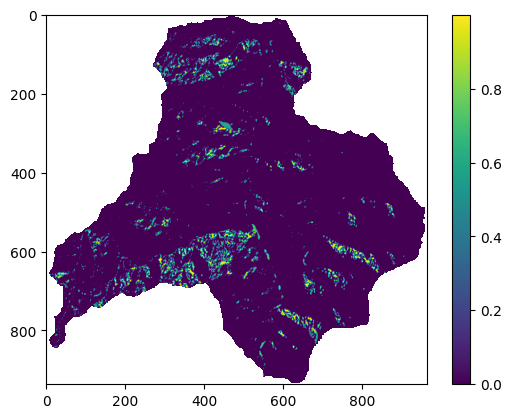

In [340]:
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

**Evaluacion de regresion logistica**

In [341]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

Validacion cruzada

In [342]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (387232, 6)
Tamaño de labels de entrenamiento: (387232,)
Tamaño de variables de validación: (96808, 6)
Tamaño de labels de validación: (96808,)


Desempeño del modelo

In [343]:
result=model.fit(x_train,y_train)

In [344]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [345]:
y_val_pred=result.predict(x_test)
y_val_probs=result.predict_proba(x_test)[:,1]

In [346]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[373065,    155],
       [  2497,  11515]])

In [347]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    373220
         1.0       0.99      0.82      0.90     14012

    accuracy                           0.99    387232
   macro avg       0.99      0.91      0.95    387232
weighted avg       0.99      0.99      0.99    387232



Text(0.5, 1.0, 'ROC Curve for training')

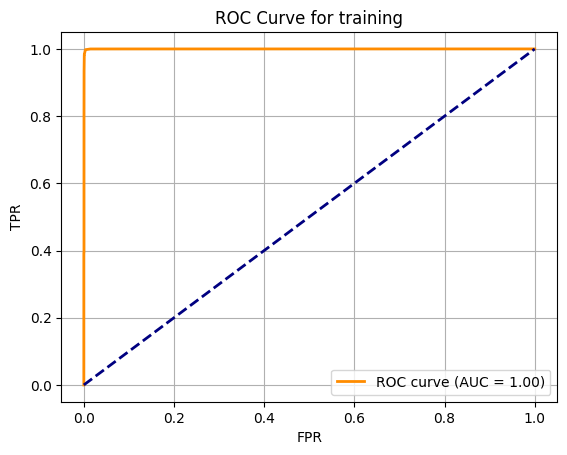

In [348]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds=roc_curve(y_train,y_train_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC Curve for training')

Capacidad de predicción

In [349]:
y_val_pred=result.predict(x_test)
y_val_probs=result.predict_proba(x_test)[:,1]

In [350]:
confusion_matrix(y_test, y_val_pred)

array([[93126,   215],
       [ 3186,   281]])

In [351]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     93341
         1.0       0.57      0.08      0.14      3467

    accuracy                           0.96     96808
   macro avg       0.77      0.54      0.56     96808
weighted avg       0.95      0.96      0.95     96808



Text(0.5, 1.0, 'ROC Curve for prediction')

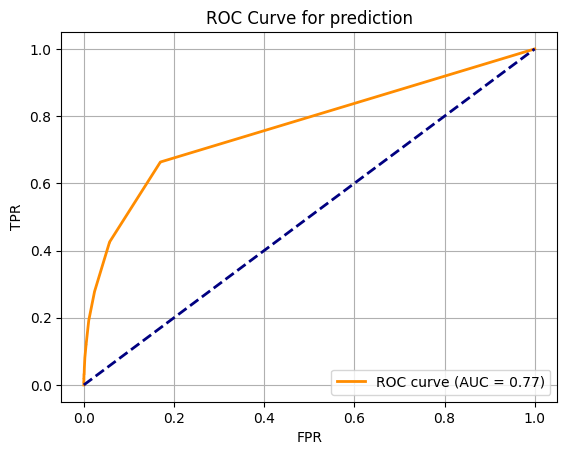

In [352]:
fpr, tpr, thresholds=roc_curve(y_test,y_val_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.title('ROC Curve for prediction')

In [353]:
i = np.arange(len(tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(fpr, index=i),'tpr' : pd.Series(tpr, index = i), '1-fpr' : pd.Series(1-fpr, index = i), 'tf' : pd.Series(tpr - (1-fpr), index = i), 'threshold' : pd.Series(thresholds, index = i)})
roc.head(len(tpr))

,fpr,tpr,1-fpr,tf,threshold
0,0.000000,0.000000,1.000000,-1.000000,2.000000
1,0.000011,0.006634,0.999989,-0.993355,1.000000
2,0.000032,0.006634,0.999968,-0.993334,0.938299
3,0.000096,0.017594,0.999904,-0.982309,0.900000
4,0.000118,0.017594,0.999882,-0.982288,0.827559
5,0.000129,0.017883,0.999871,-0.981989,0.820990
6,0.000364,0.032881,0.999636,-0.966754,0.800000
7,0.000386,0.032881,0.999614,-0.966733,0.744965
8,0.000782,0.033747,0.999218,-0.965471,0.728869
9,0.000825,0.034324,0.999175,-0.964851,0.725457


In [354]:
#funcion argsort
best=roc.iloc[(roc.tf-0).abs().argsort()[:1]]
print(best)

         fpr       tpr     1-fpr        tf  threshold
24  0.169829  0.663398  0.830171 -0.166773   0.093016


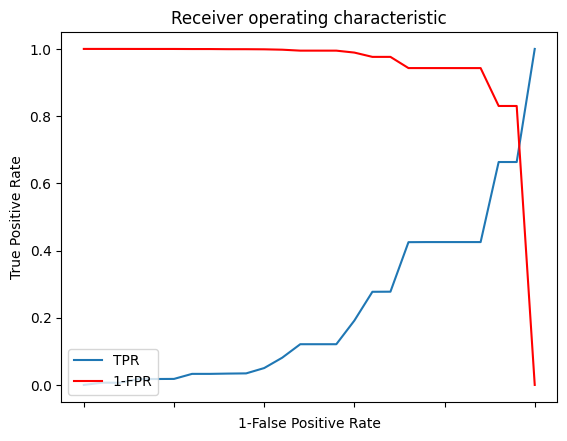

In [355]:
# Plot tpr vs 1-fpr
fig, ax = plt.subplots()
plt.plot(roc['tpr'],label='TPR')
plt.plot(roc['1-fpr'], color = 'red',label='1-FPR')
plt.xlabel('1-False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower left")

ax.set_xticklabels([]);

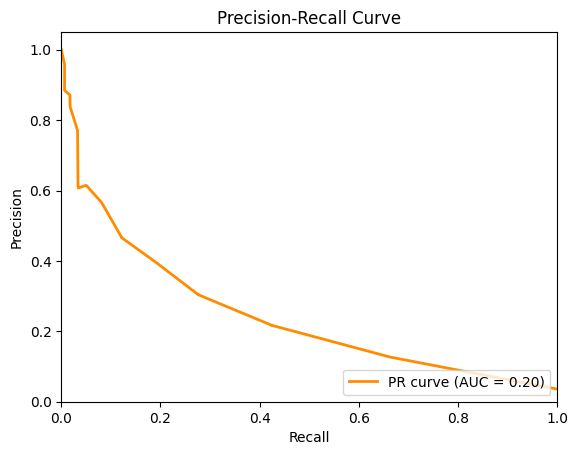

In [356]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate the Precision-Recall curve
precision, recall, th2 = precision_recall_curve(y_test, y_val_probs)
pr_auc = average_precision_score(y_test, y_val_probs)

# Plot the Precision-Recall curve
plt.plot(recall, precision, color='darkorange', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

Mapa de suceptibilidad final

In [357]:

pendiente_vector2=np.nan_to_num(pendiente_vector)
dem_vector2=np.nan_to_num(dem_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)


f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map


,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
904200,0.0,0.0,0.0,0.0,0.0,0.0
904201,0.0,0.0,0.0,0.0,0.0,0.0
904202,0.0,0.0,0.0,0.0,0.0,0.0
904203,0.0,0.0,0.0,0.0,0.0,0.0


In [358]:
y_pred=model.predict_proba(x_map)[:,1]

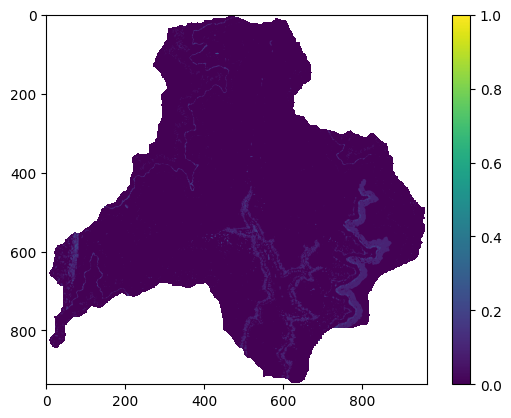

In [359]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

### **Análisis discriminante lineal**

In [360]:
!pip install scikit-learn


In [361]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

LDA = LinearDiscriminantAnalysis(n_components=1)
LDA

LinearDiscriminantAnalysis(n_components=1)

In [362]:
model = LDA.fit(X,y)

In [363]:
f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
904200,0.0,0.0,0.0,0.0,0.0,0.0
904201,0.0,0.0,0.0,0.0,0.0,0.0
904202,0.0,0.0,0.0,0.0,0.0,0.0
904203,0.0,0.0,0.0,0.0,0.0,0.0


In [364]:
IS=model.predict(x_map)

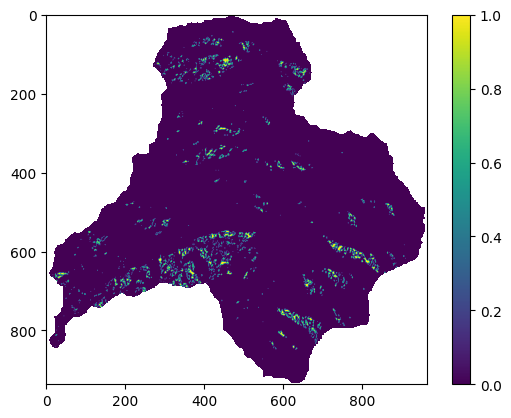

In [365]:
IS=IS.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

Evaluacion Análisis discriminante lineal

In [366]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'dem':dem_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,2692.0,14.068556,1.28,0.0,118.610458,510.0
1,2689.0,18.160751,1.28,0.0,127.568596,510.0
2,2698.0,17.216877,-0.00,0.0,121.809387,510.0
3,2695.0,19.485619,0.64,1.0,137.290604,510.0
4,2692.0,20.243055,0.64,1.0,139.398712,510.0


In [367]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [368]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (387232, 6)
Tamaño de labels de entrenamiento: (387232,)
Tamaño de variables de validación: (96808, 6)
Tamaño de labels de validación: (96808,)


In [369]:
result=model.fit(x_train,y_train)

In [370]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [371]:
y_val_pred=result.predict(x_test)
y_val_probs=result.predict_proba(x_test)[:,1]

In [372]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[373145,    168],
       [  2411,  11508]])

In [373]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    373313
         1.0       0.99      0.83      0.90     13919

    accuracy                           0.99    387232
   macro avg       0.99      0.91      0.95    387232
weighted avg       0.99      0.99      0.99    387232



Text(0.7, 0.1, 'AUC=0.9997%')

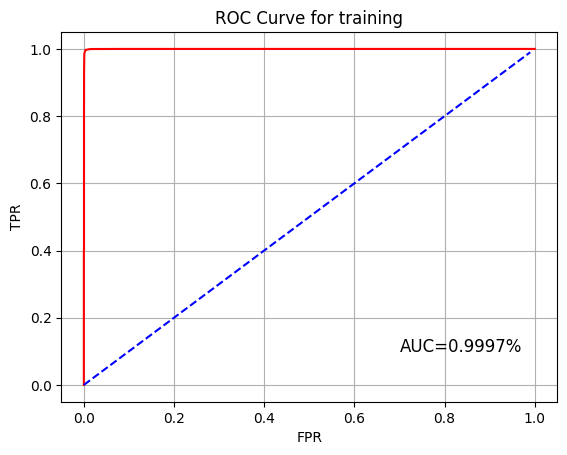

In [374]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [375]:
confusion_matrix(y_test, y_val_pred)

array([[92997,   251],
       [ 3274,   286]])

In [376]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     93248
         1.0       0.53      0.08      0.14      3560

    accuracy                           0.96     96808
   macro avg       0.75      0.54      0.56     96808
weighted avg       0.95      0.96      0.95     96808



Text(0.7, 0.1, 'AUC=0.7697%')

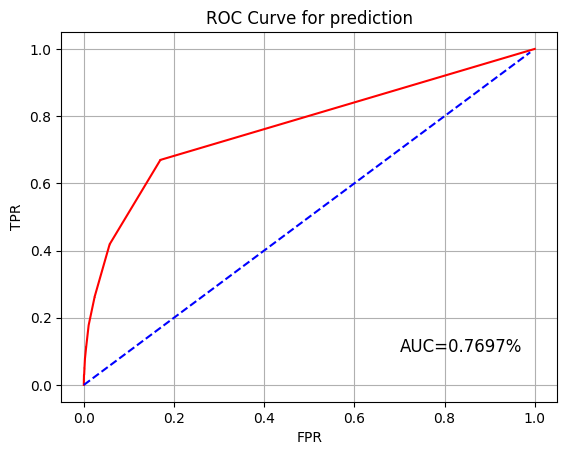

In [377]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [378]:
dem_vector2=np.nan_to_num(dem_vector)
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)



f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
904200,0.0,0.0,0.0,0.0,0.0,0.0
904201,0.0,0.0,0.0,0.0,0.0,0.0
904202,0.0,0.0,0.0,0.0,0.0,0.0
904203,0.0,0.0,0.0,0.0,0.0,0.0


In [379]:
y_pred=model.predict_proba(x_map)[:,1]

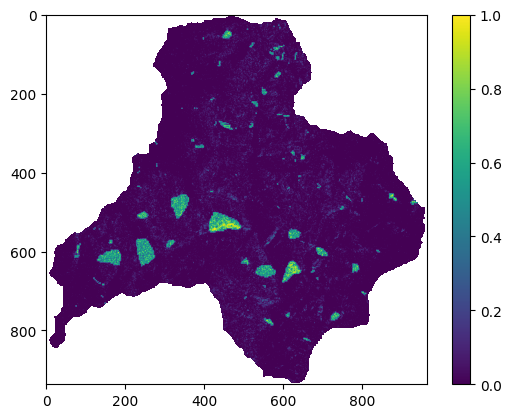

In [380]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

### **Support vector machine**

In [381]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators= 1000)

In [382]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=0.01)]
X_01=df1.drop("inventario", axis=1)
y_01=df1['inventario']
df1['inventario'].value_counts()

1.0    17479
0.0     4646
Name: inventario, dtype: int64

In [383]:
rf.fit(X_01, y_01);

In [384]:
IS_01=rf.predict(x_map)

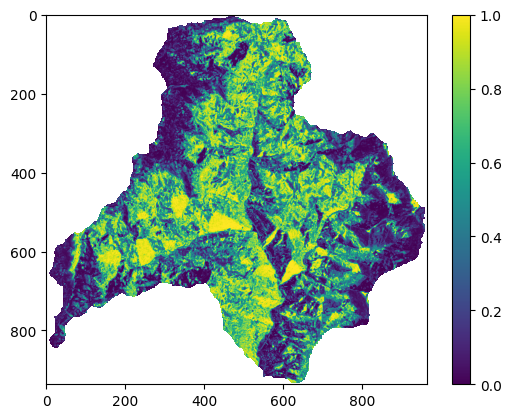

In [385]:
IS_01=IS_01.reshape(pendiente.shape)
IS_01=np.where(pendiente<0,np.nan,IS_01)
plt.imshow(IS_01)
plt.colorbar();

In [386]:
print(list(rf.feature_importances_))

[0.3808629660475251, 0.1736121726117014, 0.08150058578593584, 0.0721598834870663, 0.25783672794786705, 0.03402766411990444]


Evaluacion de Support vector machine

In [387]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'dem':dem_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,2692.0,14.068556,1.28,0.0,118.610458,510.0
1,2689.0,18.160751,1.28,0.0,127.568596,510.0
2,2698.0,17.216877,-0.00,0.0,121.809387,510.0
3,2695.0,19.485619,0.64,1.0,137.290604,510.0
4,2692.0,20.243055,0.64,1.0,139.398712,510.0


In [388]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

In [389]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (387232, 6)
Tamaño de labels de entrenamiento: (387232,)
Tamaño de variables de validación: (96808, 6)
Tamaño de labels de validación: (96808,)


In [390]:
result=model.fit(x_train,y_train)

In [391]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [392]:
y_val_pred=result.predict(x_test)
y_val_probs=result.predict_proba(x_test)[:,1]

In [393]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[373081,    178],
       [  2339,  11634]])

In [394]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00    373259
         1.0       0.98      0.83      0.90     13973

    accuracy                           0.99    387232
   macro avg       0.99      0.92      0.95    387232
weighted avg       0.99      0.99      0.99    387232



Text(0.7, 0.1, 'AUC=0.7686%')

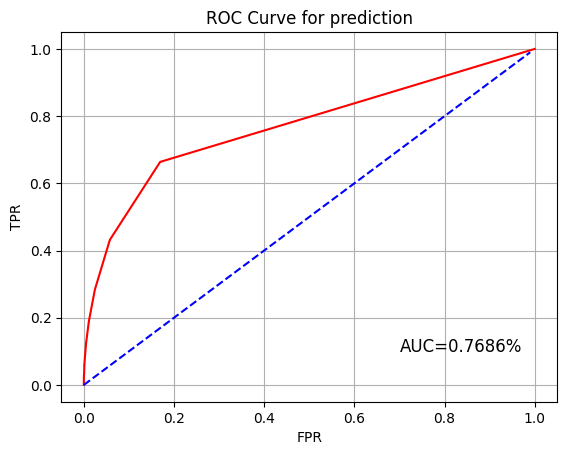

In [395]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [396]:
confusion_matrix(y_test, y_val_pred)

array([[93067,   235],
       [ 3212,   294]])

In [397]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     93302
         1.0       0.56      0.08      0.15      3506

    accuracy                           0.96     96808
   macro avg       0.76      0.54      0.56     96808
weighted avg       0.95      0.96      0.95     96808



Text(0.7, 0.1, 'AUC=0.7686%')

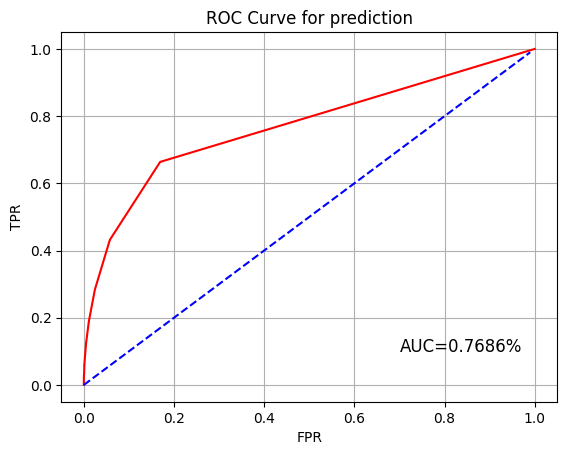

In [398]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [399]:
dem_vector2=np.nan_to_num(dem_vector)
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)



f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
904200,0.0,0.0,0.0,0.0,0.0,0.0
904201,0.0,0.0,0.0,0.0,0.0,0.0
904202,0.0,0.0,0.0,0.0,0.0,0.0
904203,0.0,0.0,0.0,0.0,0.0,0.0


In [400]:
y_pred=model.predict_proba(x_map)[:,1]

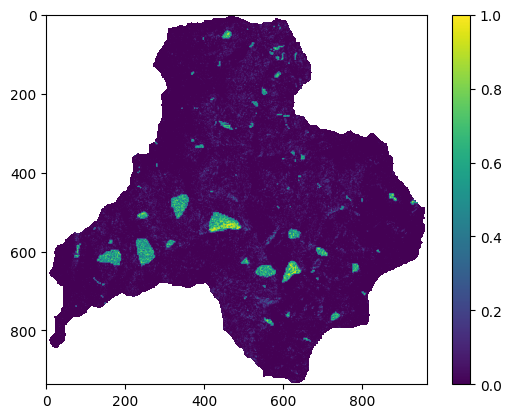

In [401]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();

### **Redes Neuronales**

In [402]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)  # dos capas escondidas, la primera con 5 neuronas y la segunda con dos neuronas
mlp

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [403]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_01)
X_trans = scaler.transform(X_01)

In [404]:
mlp.fit(X_01,y_01)

MLPClassifier(hidden_layer_sizes=(5, 2), max_iter=500)

In [405]:
IS=mlp.predict(x_map)

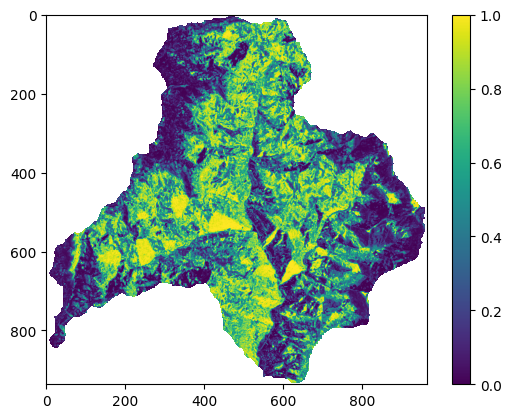

In [406]:
IS_01=IS_01.reshape(pendiente.shape)
IS_01=np.where(pendiente<0,np.nan,IS_01)
plt.imshow(IS_01)
plt.colorbar();



```
# Tiene formato de código
```

**EValuacion del modelo redes neuronales**

In [407]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'dem':dem_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,2692.0,14.068556,1.28,0.0,118.610458,510.0
1,2689.0,18.160751,1.28,0.0,127.568596,510.0
2,2698.0,17.216877,-0.00,0.0,121.809387,510.0
3,2695.0,19.485619,0.64,1.0,137.290604,510.0
4,2692.0,20.243055,0.64,1.0,139.398712,510.0


In [408]:
from sklearn.ensemble import RandomForestClassifier
model = MLPClassifier(hidden_layer_sizes=(5,2),max_iter=500)

Validación cruzada

In [409]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print('Tamaño de variables de entrenamiento:', x_train.shape)
print('Tamaño de labels de entrenamiento:', y_train.shape)
print('Tamaño de variables de validación:', x_test.shape)
print('Tamaño de labels de validación:', y_test.shape)

Tamaño de variables de entrenamiento: (387232, 6)
Tamaño de labels de entrenamiento: (387232,)
Tamaño de variables de validación: (96808, 6)
Tamaño de labels de validación: (96808,)


Desempeño del modelo

In [410]:
result=model.fit(x_train,y_train)

In [411]:
y_train_pred=result.predict(x_train) # utiliza por defecto el valor de 0,5, por encime es uno y por debajo es 0
y_train_probs=result.predict_proba(x_train)[:,1]

In [412]:
y_val_pred=result.predict(x_test)
y_val_probs=result.predict_proba(x_test)[:,1]

In [413]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[373207,      0],
       [ 14025,      0]])

In [414]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98    373207
         1.0       0.00      0.00      0.00     14025

    accuracy                           0.96    387232
   macro avg       0.48      0.50      0.49    387232
weighted avg       0.93      0.96      0.95    387232



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.7, 0.1, 'AUC=0.5%')

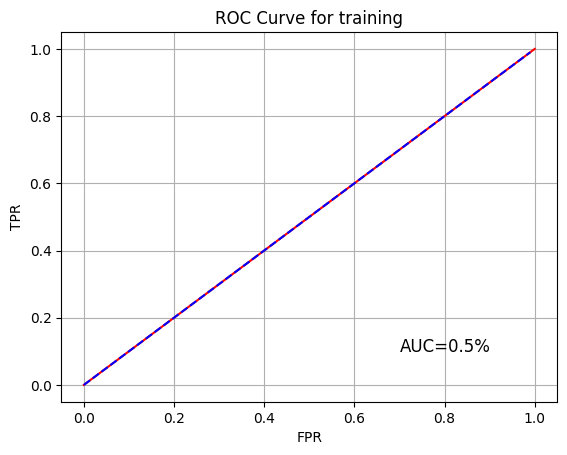

In [415]:
from sklearn import metrics
fpr, tpr, _=metrics.roc_curve(y_train,y_train_probs)
plt.plot(fpr,tpr,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for training')
auc=str(round(metrics.auc(fpr,tpr),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

Capacidad de predicción

In [416]:
confusion_matrix(y_test, y_val_pred)

array([[93354,     0],
       [ 3454,     0]])

In [417]:
print(classification_report(y_test,y_val_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     93354
         1.0       0.00      0.00      0.00      3454

    accuracy                           0.96     96808
   macro avg       0.48      0.50      0.49     96808
weighted avg       0.93      0.96      0.95     96808



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.7, 0.1, 'AUC=0.5%')

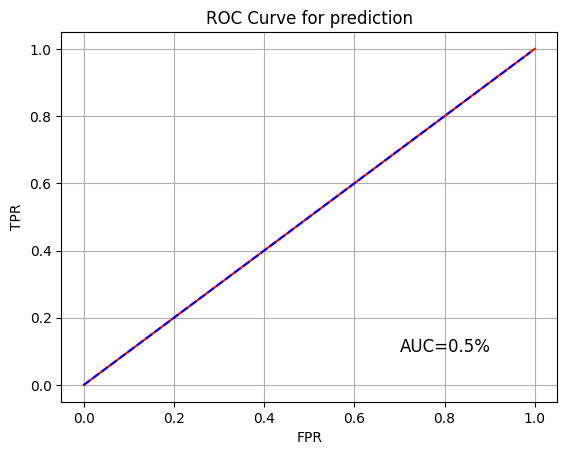

In [418]:
fpr, sensitivity, _=metrics.roc_curve(y_test,y_val_probs)
plt.plot(fpr,sensitivity,color='r')
xb=[i*0.01 for i in range(100)]
yb=[i*0.01 for i in range(100)]
plt.plot(xb,yb,linestyle='--',color='b')
plt.grid(True)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve for prediction')
auc=str(round(metrics.auc(fpr,sensitivity),4))
plt.text(x=0.7,y=0.1,s='AUC='+auc+'%',size=12)

In [419]:
dem_vector2=np.nan_to_num(dem_vector)
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)



f={'dem':dem_vector2,'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
x_map

,dem,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
904200,0.0,0.0,0.0,0.0,0.0,0.0
904201,0.0,0.0,0.0,0.0,0.0,0.0
904202,0.0,0.0,0.0,0.0,0.0,0.0
904203,0.0,0.0,0.0,0.0,0.0,0.0


In [420]:
y_pred=model.predict_proba(x_map)[:,1]

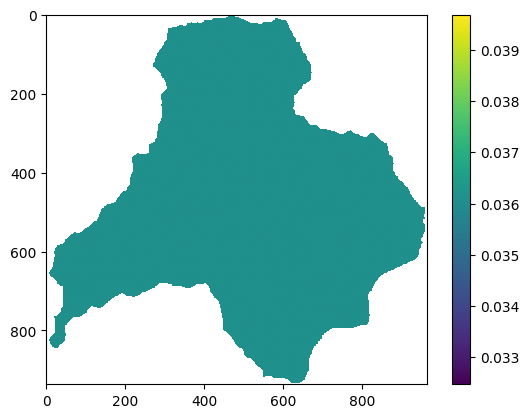

In [421]:
#mascara para crear el mapa de la cuenca
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

#Convertir el vector de resultados a la matriz del mapa de la cuenca a aprtir de la matriz de pendiente
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();